* Mauricio Hernández López
* Bárbara García Quiroga

# Lectura de los datos e importación de los paquetes necesarios

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [54]:
df = pd.read_csv('mexico_covid19.csv')
df

,id,FECHA_ARCHIVO,ID_REGISTRO,ENTIDAD_UM,ENTIDAD_RES,RESULTADO,DELAY,ENTIDAD_REGISTRO,ENTIDAD,ABR_ENT,...,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,9269,2020-04-12,00011f,25,25,2,0,25,Sinaloa,SL,...,2,2,1,2,2,2,99,MÃ©xico,97,97
1,33333,2020-04-12,00014e,14,14,2,0,14,Jalisco,JC,...,2,2,1,2,1,99,99,MÃ©xico,97,2
2,35483,2020-04-12,000153,8,8,1,0,8,Chihuahua,CH,...,2,2,2,2,2,99,99,MÃ©xico,97,2
3,7062,2020-04-12,0001b6,9,15,1,0,9,Ciudad de Mexico,DF,...,2,2,1,2,2,99,99,MÃ©xico,97,97
4,23745,2020-04-12,0001c1,9,9,2,0,9,Ciudad de Mexico,DF,...,2,2,2,2,2,99,99,MÃ©xico,97,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263002,7094887,2020-06-03,1e019c,32,32,1,0,32,Zacatecas,ZS,...,2,2,2,2,2,1,99,MÃ©xico,99,97
263003,7053721,2020-06-03,1e2b05,12,12,1,0,12,Guerrero,GR,...,2,2,1,2,2,99,99,MÃ©xico,99,2
263004,7055429,2020-06-03,1e473f,20,20,1,0,20,Oaxaca,OC,...,2,2,2,1,2,99,99,MÃ©xico,99,2
263005,7043768,2020-06-03,1e6da1,13,13,1,0,13,Hidalgo,HG,...,2,2,2,2,2,2,99,MÃ©xico,99,2


In [55]:
df.columns

Index(['id', 'FECHA_ARCHIVO', 'ID_REGISTRO', 'ENTIDAD_UM', 'ENTIDAD_RES',
       'RESULTADO', 'DELAY', 'ENTIDAD_REGISTRO', 'ENTIDAD', 'ABR_ENT',
       'FECHA_ACTUALIZACION', 'ORIGEN', 'SECTOR', 'SEXO', 'ENTIDAD_NAC',
       'MUNICIPIO_RES', 'TIPO_PACIENTE', 'FECHA_INGRESO', 'FECHA_SINTOMAS',
       'FECHA_DEF', 'INTUBADO', 'NEUMONIA', 'EDAD', 'NACIONALIDAD', 'EMBARAZO',
       'HABLA_LENGUA_INDIG', 'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR',
       'HIPERTENSION', 'OTRA_COM', 'CARDIOVASCULAR', 'OBESIDAD',
       'RENAL_CRONICA', 'TABAQUISMO', 'OTRO_CASO', 'MIGRANTE',
       'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'UCI'],
      dtype='object')

# Introducción

La base de datos escogida para realizar este proyecto es la de Datos Clínicos de COVID-19 en México. La cual incluye información detallada sobre pacientes a los cuales se les aplicó la prueba PCR para saber si estaban contagiados o no del virus SARS CoV-2, el cual ha afectado a casi 140 millones de personas alrededor del mundo.

Entre los datos, se incluye información sobre las comorbilidades que podría padecer cada uno de los pacientes (como asma o enfermedades cardiovasculares), su estado de residencia, el estado donde le fueron hechas las pruebas, la fecha en la que presentaron los síntomas, la fecha del diagnóstico, e incluso la fecha de fallecimiento (si es que hay alguna disponible). 

El objetivo principal de este proyecto es el de entrenar una serie de modelos estadísticos que sean capaces de predecir en base a algunas características si es que una persona está contagiada o no del virus, por lo que, eventualmente, nuestra variable "target" u objetivo, será la columna de $['RESULTADO']$. Los datos serán limpiados y reorganizados a nuestra conveniencia como paso previo, pues hay que descartar una buena cantidad de datos que no son reelevantes para el análisis, entre otros ajustes.

In [56]:
df.isnull().sum()

id                     0
FECHA_ARCHIVO          0
ID_REGISTRO            0
ENTIDAD_UM             0
ENTIDAD_RES            0
RESULTADO              0
DELAY                  0
ENTIDAD_REGISTRO       0
ENTIDAD                0
ABR_ENT                0
FECHA_ACTUALIZACION    0
ORIGEN                 0
SECTOR                 0
SEXO                   0
ENTIDAD_NAC            0
MUNICIPIO_RES          6
TIPO_PACIENTE          0
FECHA_INGRESO          0
FECHA_SINTOMAS         0
FECHA_DEF              0
INTUBADO               0
NEUMONIA               0
EDAD                   0
NACIONALIDAD           0
EMBARAZO               0
HABLA_LENGUA_INDIG     0
DIABETES               0
EPOC                   0
ASMA                   0
INMUSUPR               0
HIPERTENSION           0
OTRA_COM               0
CARDIOVASCULAR         0
OBESIDAD               0
RENAL_CRONICA          0
TABAQUISMO             0
OTRO_CASO              0
MIGRANTE               0
PAIS_NACIONALIDAD      0
PAIS_ORIGEN            0


In [57]:
df = df.dropna()
df

,id,FECHA_ARCHIVO,ID_REGISTRO,ENTIDAD_UM,ENTIDAD_RES,RESULTADO,DELAY,ENTIDAD_REGISTRO,ENTIDAD,ABR_ENT,...,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,9269,2020-04-12,00011f,25,25,2,0,25,Sinaloa,SL,...,2,2,1,2,2,2,99,MÃ©xico,97,97
1,33333,2020-04-12,00014e,14,14,2,0,14,Jalisco,JC,...,2,2,1,2,1,99,99,MÃ©xico,97,2
2,35483,2020-04-12,000153,8,8,1,0,8,Chihuahua,CH,...,2,2,2,2,2,99,99,MÃ©xico,97,2
3,7062,2020-04-12,0001b6,9,15,1,0,9,Ciudad de Mexico,DF,...,2,2,1,2,2,99,99,MÃ©xico,97,97
4,23745,2020-04-12,0001c1,9,9,2,0,9,Ciudad de Mexico,DF,...,2,2,2,2,2,99,99,MÃ©xico,97,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263002,7094887,2020-06-03,1e019c,32,32,1,0,32,Zacatecas,ZS,...,2,2,2,2,2,1,99,MÃ©xico,99,97
263003,7053721,2020-06-03,1e2b05,12,12,1,0,12,Guerrero,GR,...,2,2,1,2,2,99,99,MÃ©xico,99,2
263004,7055429,2020-06-03,1e473f,20,20,1,0,20,Oaxaca,OC,...,2,2,2,1,2,99,99,MÃ©xico,99,2
263005,7043768,2020-06-03,1e6da1,13,13,1,0,13,Hidalgo,HG,...,2,2,2,2,2,2,99,MÃ©xico,99,2


In [58]:
excluded = ['id', 'ID_REGISTRO',
     'FECHA_ARCHIVO', 'FECHA_ACTUALIZACION', 'FECHA_DEF', 'FECHA_INGRESO','FECHA_SINTOMAS',
     'ABR_ENT', 'ENTIDAD', 'MIGRANTE', 'NACIONALIDAD', 'ORIGEN', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN',
     'INTUBADO', 'UCI', 'DIABETES', 'HIPERTENSION', 'NEUMONIA', 'ASMA', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
           'EMBARAZO', 'OTRO_CASO', 'CARDIOVASCULAR', 'OTRA_COM','EPOC', 'DELAY', 'ENTIDAD_UM', 'MUNICIPIO_RES', 'TIPO_PACIENTE', 'ENTIDAD_NAC',
           'ENTIDAD_RES']

df = df.drop(excluded, axis = 1)

In [59]:
df.columns

Index(['RESULTADO', 'ENTIDAD_REGISTRO', 'SECTOR', 'SEXO', 'EDAD',
       'HABLA_LENGUA_INDIG', 'INMUSUPR'],
      dtype='object')

In [60]:
for column in df.columns:
    print(column)
    print(df[column].unique())

RESULTADO
[2 1]
ENTIDAD_REGISTRO
[25 14  8  9 19 17 27 15  5 28 11 24 31  2 21 32 13  3 26 16 30  1 10 12
 20 29 18  7 22 23  6  4]
SECTOR
[12  4  5  9  3  6 13 11 10  2  8  7  1 99]
SEXO
[2 1]
EDAD
[ 74  71  50  25  28  67  44  62  30  32  53  39  42  45  23  36   8  29
  34  15  35  47  19   1  26  27  61  64  63  21  41  55  43  70  37  40
  31  60  81  33  46  38  13  65   2  24  99  52  59  48  17  72  54  22
  20   4   7  49  18  82  84  56  57  51  73  58   0  78   5  77  11  75
   3  12  89  69   6  66  76  68  83  95  86  80  14  10  16  91  90  98
  85  87  79   9  88 102  93  94  96  92 100  97 101 107 109 113 110 120
 105 103 114 108 106 111 104 118 115]
HABLA_LENGUA_INDIG
[ 2  1 99]
INMUSUPR
[ 2  1 98]


In [77]:
df["ENTIDAD_REGISTRO"] = df["ENTIDAD_REGISTRO"].replace(99, np.NaN)
df["HABLA_LENGUA_INDIG"] = df["HABLA_LENGUA_INDIG"].replace(99, np.NaN)
df["INMUSUPR"] = df["INMUSUPR"].replace(98, np.NaN)
df["SECTOR"] = df["SECTOR"].replace(99, np.NaN)
df.isnull().sum()

RESULTADO                0
ENTIDAD_REGISTRO         0
SECTOR                1285
SEXO                     0
EDAD                     0
HABLA_LENGUA_INDIG    7025
INMUSUPR              1038
dtype: int64

In [85]:
df = df.dropna()

In [86]:
for column in df.columns:
    print(column)
    print(df[column].unique())

RESULTADO
[2 1]
ENTIDAD_REGISTRO
[25 14  8  9 19 17 27 15  5 28 11 24 31  2 21 32 13  3 26 16 30  1 10 12
 20 29 18  7 22 23  6  4]
SECTOR
[12.  4.  5.  9.  3.  6. 13. 11. 10.  2.  8.  7.  1.]
SEXO
[2 1]
EDAD
[ 74  71  50  25  28  67  44  62  30  32  53  39  42  45  23  36   8  29
  34  15  35  47  19   1  26  27  61  64  63  21  41  55  43  70  37  40
  31  60  81  33  46  38  13  65   2  24  99  52  59  48  17  72  54  22
  20   4   7  49  18  82  84  56  57  51  73  58   0  78   5  77  11  75
   3  12  89  69   6  66  76  68  83  95  86  80  14  10  16  91  90  98
  85  87  79   9  88 102  93  94  96  92 100  97 101 107 109 113 110 120
 105 103 114 108 106 111 104 118 115]
HABLA_LENGUA_INDIG
[2. 1.]
INMUSUPR
[2. 1.]


array([[<AxesSubplot:title={'center':'EDAD'}>,
        <AxesSubplot:title={'center':'ENTIDAD_REGISTRO'}>,
        <AxesSubplot:title={'center':'HABLA_LENGUA_INDIG'}>],
       [<AxesSubplot:title={'center':'INMUSUPR'}>,
        <AxesSubplot:title={'center':'RESULTADO'}>,
        <AxesSubplot:title={'center':'SECTOR'}>],
       [<AxesSubplot:title={'center':'SEXO'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

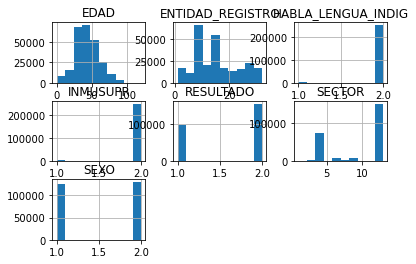

In [87]:
df.hist()

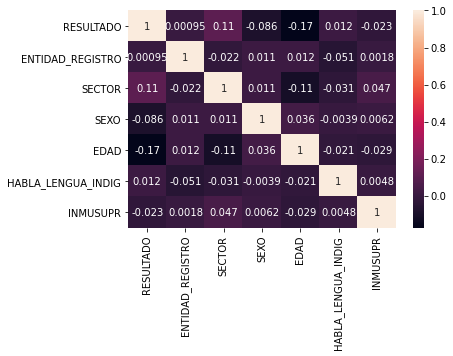

In [88]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [89]:
X = df.drop("RESULTADO", axis = 1)
y = df["RESULTADO"]

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Método 1: Árbol

Realizado por: Mauricio

El modelo de árbol de decisión es uno de los más usados en machine learning. Consiste en una representación descendiente de un diagrama de flujo que consta de diferentes "ramas" y nodos, los cuales representan los distintos atributos del conjunto de datos, así como las decisiones que tomarán conforme se avance en él. En la parte superior del árbol, se encuentra un único nodo al que denominamos "nodo raíz", el cual usualmente es el atributo "más importante" o aquel que tenga un papel más relevante que los demás sobre la característica objetivo.

De cada nodo brotan ramas, las cuales son los "caminos" que una entrada de datos puede seguir para ser clasificada en una categoría, cada rama tiene una condición que se puede cumplir o no, la cual está determinada en función de los parámetros de la base de datos. Esta estructura continúa hasta que se alcanzan los últimos nodos, los cuales denominamos "hojas", y representan la decisión final de clasificación, es decir, son el "output" del árbol, pues indican directamente a qué categoría ha sido asignada un objeto directamente.

Conforme se avanza en las ramas, los datos se dividen en subconjuntos de si mismos cada vez más pequeños, los cuales se van "limpiando" poco a poco, con el fin de lograr una clasificación precisa.

Para asegurar que los atributos correctos han sido seleccionados, se pueden utilizar distintas métricas estadísticas, tales como la impureza de Gini o la entropía. La primera de ellas, representa cuan a menudo puede ser un elemento clasificado de forma incorrecta con respecto a los otros parámetros de ese subconjunto específico, cuando el coeficiente de Gini alcanza un valor de cero, decimos que ese nodo es "puro" con lo cual hemos eliminado completamente el error de clasificación, y es calculado de la siguiente manera:

$I_G(f) = \displaystyle 1-\sum_{i=1}^{m} f_{i}^{2}$

Por otra parte, la entropía es una métricada usualmente utilizada en física para medir el "nivel de desorden" dentro de un sistema. En palabras más formales, la entropía mide cuán aleatorios son los eventos que suceden dentro de un ambiente. Para medir la entropía del sistema entero, se usa la siguiente expresión:

$H(X)=\displaystyle\sum_{i}^{n} p_{i} \log \left(1 / p_{i}\right)$

Existen otras métricas para poder medir la impureza de un nodo en un árbol de decisión, sin embargo, la matemática detrás de ellos es muy compleja. Los aquí presentados son conceptos simples de entender y de aplicar.

Como se puede ver a continuación, el árbol de decisión ajustado para los datos que utilizamos, apenas tuvo un 0.63 de puntuación de precisión, lo cual es bastante bajo para la cantidad de datos con la que se alimentó al modelo (la base de datos entera tenía más de 200,000 entradas), y estamos seguros de que eso se debe en general a la poca correlación que existe entre las variables que conforman la base de datos, pues impide el reconocimiento de patrones que ayuden a la clasificación de nuevas entradas.

Como un extra, también se añade una pequeña visualización del diagrama de árbol que representa al modelo.

In [99]:
dtree = tree.DecisionTreeClassifier(max_depth=6)
dtree = dtree.fit(X_train,y_train)

y_pred = dtree.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6364729064039409


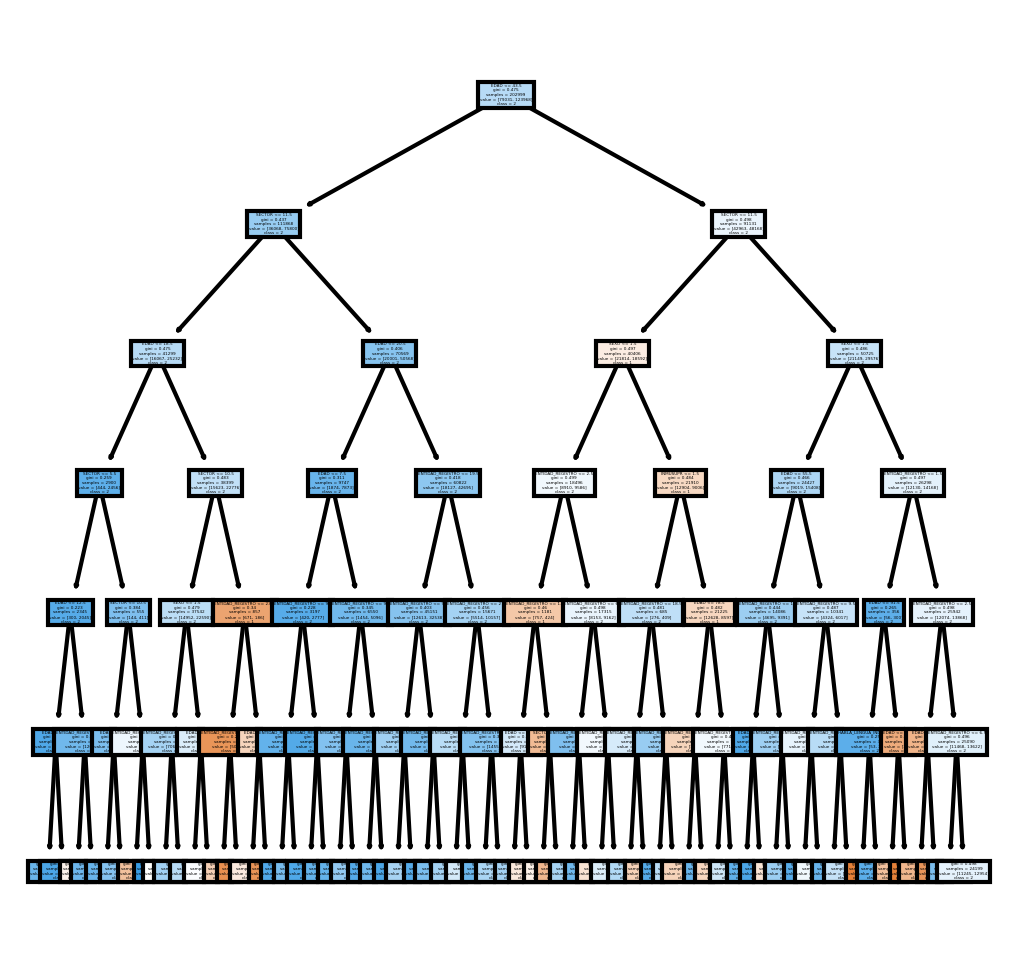

In [100]:
feature_names = ['ENTIDAD_REGISTRO', 'SECTOR', 'SEXO', 'EDAD',
       'HABLA_LENGUA_INDIG', 'INMUSUPR']
target_names = ['1', '2']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(dtree, filled=True,
                          feature_names=feature_names,
                          class_names=target_names)

fig.savefig('imagename5.png')

# Método 2: SVM

Realizado por: Bárbara

In [103]:
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, y_train)

y_pred = svclassifier.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.48102463054187194


# Método 3: RNN (SKLEARN)

Realizado por: Mauricio

Una red neuronal es un modelo de aprendizaje automático que está inspirado en el funcionamiento del cerebro de los seres vivos, más particularmente de nostros, los seres humanos. La idea en general es bastante simple, una serie de neuronas conectadas entre sí que sean capaces de trabajar conjuntamente para poder ver y "aprender" de los datos, de tal forma que, al final de dicha red, el sistema sea capáz de otorgar una respuesta. Las redes neuronales son usualmente utilizadas como clasificadores, aunque también pueden ser usadas como regresores en ciertos casos. 

La composición de una red neuronal es también bastante simple. De forma similar a la de una árbol de decisión, vemos que existen dos elementos principales, nodos y conexiones; cada nodo equivale a una neurona artificial, y cada línea representa la conexión entre una neurona y otra. Las redes neuronales usualmente se ordenan en forma de "capas", las cuales son conjuntos de neuronas que NO están conectadas entre sí, sino que actúan como una especie de puente de procesamiento de información entre la capa anterior y la siguiente. 

La primera capa o "entrada" son el conjunto de neuronas que reciben los datos en bruto, sin ningún tipo de procesamiento. La única función de estas neuronas de entrada es la de pasar la información hacia la capa posterior, que forma parte de lo que denominamos "capas ocultas" que es donde todo el procesamiento de toma de decisiones se realiza. Finalmente, la última capa oculta activa las neuronas de salida, las cuales entregan el resultado final de la clasificación.

A diferencia del árbol de decisión que tiene una estructura de diagrama de flujo, y que se basa en codiciones si/no, la red neuronal está distribuída en forma de grafo ponderado, por lo que usualmente resulta ser más compleja y más eficiente. Las capas ocultas de una red neuronal tienen una serie de valores adjuntos a las conexiones de las neuronas a las que denominamos "pesos", por los cuales se multiplica el valor de salida de la neurona anterior, lo cual ajusta el resultado y permite que se siga el "camino correcto" dentro de la red, para así garantizar una clasificación precisa. Estos valores son usualmente procesados por un componente propio de cada neurona, el cual se denomina como "función de activación" la cual modifica el valor recibido e impone condiciones que determinarán si la neurona se "enciende" o no. Es importante destacar que la asignación de los pesos no es artificial, sino que se ajusta dentro de la propia red neuronal y la grán mayoría de las veces es imposible explicar el proceso de razonamiento que tuvo el sistema para asignar cada poderación en la forma en la que lo hizo, por eso es que las denominamos como "capas ocultas" o como "caja negra", ya que realmente no sabemos con precisión qué es lo que sucede ahí, contrario a un arbol de decisión por ejemplo.

Las redes neuronales han probado ser esenciales cuando se necesita identificar patrones complejos dentro de los datos, y su eficiencia aumenta proporcionalmente a la cantidad de datos que se le provea, pues su base de conocimientos será más amplia y podrá deducir más características.

Existen varios algoritmos para la optimización en la asignación de pesos, en este caso específico, utilizamos el algorimo 'adam' y 'lbfgs'. Como podemos ver, tuvieron una precisión de 0.64 y 0.62 respectivamente, también variamos la cantidad de neuronas en las capas ocultas. 

In [101]:
neural = MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(24,36), random_state=1)
neural = neural.fit(X_train, y_train)

y_pred = neural.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.648847290640394


# Método 4: RNN 2

Realizado por: Bárbara

In [104]:
rnn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(58,36), random_state=1)
rnn.fit(X_train, y_train)

y_pred = rnn.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6236650246305419


# Método 5: K-Nearest Neighbors

Realizado por: Mauricio

El algoritmo de K-Vecinos más Cercanos (o KNN por sus siglas en inglés) es un modelo de aprendizaje supervisado en machine learning que sirve para clasificar entradas de datos en categorías definidas.

El concepto del algoritmo KNN es realmente simple. Dado un punto que represente una entrada de datos, el algoritmo identifica cuales son los registros conocidos similares a esa nueva entrada; esto lo hace por medio del cálculo de la distancia entre el punto objetivo y sus "vecinos", es decir, aquellos objetos que se encuentren más cercanos a él.

Una vez la distancia se ha calculado, se hace una "votación" para la cual se toma en cuenta la clasificación (ya conocida) de esos K-Vecinos, y por eliminación, el punto nuevo se asigna a la clase que gane la votación por mayoría. Es importante destacar que $k$ usualmente debe definirse como un número impar para evitar un empate al momento de decidir la clase mayoritaria. Por ejemplo, en caso de $k = 4$, podría darse el caso de que 2 elementos pertenezcan a la clase 1 y 2 elementos pertenezcan a la clase 2, lo cual supondría un problema al momento de clasificar el punto. Mientras que si $k$ no es divisible entre 2, se garantiza que siempre habrá una clase mayoritaria.

Es un algoritmo bastante sencillo y que no calcula parámetros, sino que directamente busca similitudes entre los datos por medio de sus distancias como ya se había mencionado. Estas distancias pueden ser calculadas de 3 formas distintas:

Distancia Euclidiana:

$D =\displaystyle\sqrt{\sum_{i=1}^{n}\left(y_{i}-x_{i}\right)^{2}}$

Distancia Manhattan:

$|D =\displaystyle\sum_{i=1}^{d}\left|a_{i}-b_{i}\right|$

Distancia Minkowski:

$D=\displaystyle\left(\sum_{i=1}^{n} \mid \mathrm{p}_{\boldsymbol{i}}-\mathrm{q}_{\boldsymbol{i}}^{\mathrm{p}}\right)^{1 / \mathrm{p}}$

Este es un algoritmo que, si bien es simple, puede resultar inconveniente, puesto que el tiempo de cálculo de distancias se vuelve demasiado grande para conjuntos de datos suficientemente grandes. En este caso específico, con una base de datos de más de 200,000 entradas, el modelo tardó aproximadamente 35 minutos en realizar las predicciones, por lo que es necesario hacer ajustes a las dimensiones de los datos. Además, debido a la necesidad de tener los datos disponibles en todo momento para calcular los K-Vecinos, no puede ser usado para hacer predicciones en tiempo real

In [102]:
KNN = KNeighborsClassifier()
KNN = KNN.fit(X_train, y_train)

y_pred = KNN.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6298128078817734


# Método 6: Clasificador Naive-Bayes

Realizado por: Bárbara

In [105]:
naivBay = GaussianNB()
naivBay.fit(X_train, y_train)
y_pred = naivBay.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6251428571428571
